In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read the CSV file
lpop_distances = pd.read_csv('./outputs/lpop_distances.csv')

# Columns used in the model
columns_to_check = ['q2', 'q1tb', 'ur1new', 'edr', 'conocim', 'gpt_distance_norm', 'cohere_distance_norm', 'bard_distance_norm']

# Drop rows with NaNs in the specific columns
lpop_distances = lpop_distances.dropna(subset=columns_to_check)

# Define the independent variables and the dependent variable for the gpt_distance_norm model

def ols_of(model, title):
    X = lpop_distances[['q2', 'q1tb', 'ur1new', 'edr', 'conocim']]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    y = lpop_distances[model+'_distance_norm']

    # Fit the OLS model
    model = sm.OLS(y, X).fit()
    print(model.summary())

    # Predict values and calculate residuals
    predicted_values = model.predict(X)
    residuals = y - predicted_values

    # Plot residuals vs predicted values
    plt.scatter(predicted_values, residuals)
    plt.xlabel('Valores Predichos')
    plt.ylabel('Residuos')
    plt.title(title) # 'Gráfico de Residuos vs Valores Predichos GPT'
    plt.axhline(y=0, linestyle='--', color='grey')
    return plt




                            OLS Regression Results                            
Dep. Variable:      gpt_distance_norm   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     15.50
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           7.62e-15
Time:                        15:45:39   Log-Likelihood:                -76.902
No. Observations:                1327   AIC:                             165.8
Df Residuals:                    1321   BIC:                             196.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7602      0.051     14.923      0.0

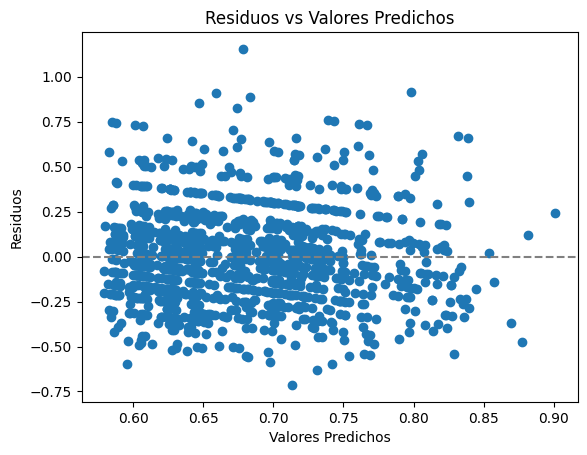

In [4]:
ols_of('gpt', 'Residuos vs Valores Predichos').show()